# Naive Bayes Classification on Iris Dataset

In [1]:
# Importing the required libraries

import sklearn # For machine learning functions
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating static, animated, and interactive visualizations in Python
import seaborn as sns # For data visualization based on matplotlib
import numpy as np # For numerical operations

/tmp/ipykernel_15221/3009800371.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # For data manipulation and analysis


# Load and Explore the Iris Dataset
Load the Iris dataset from sklearn datasets and explore its structure and features.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

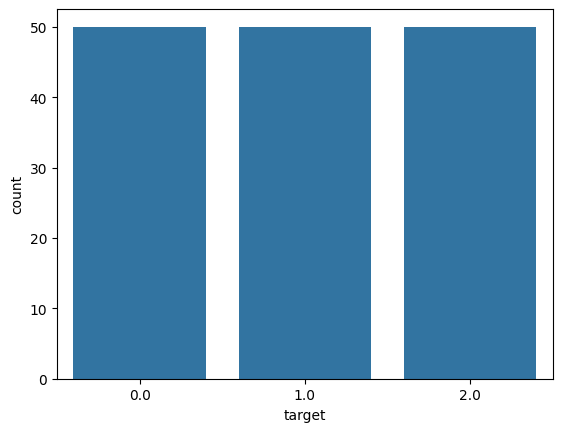

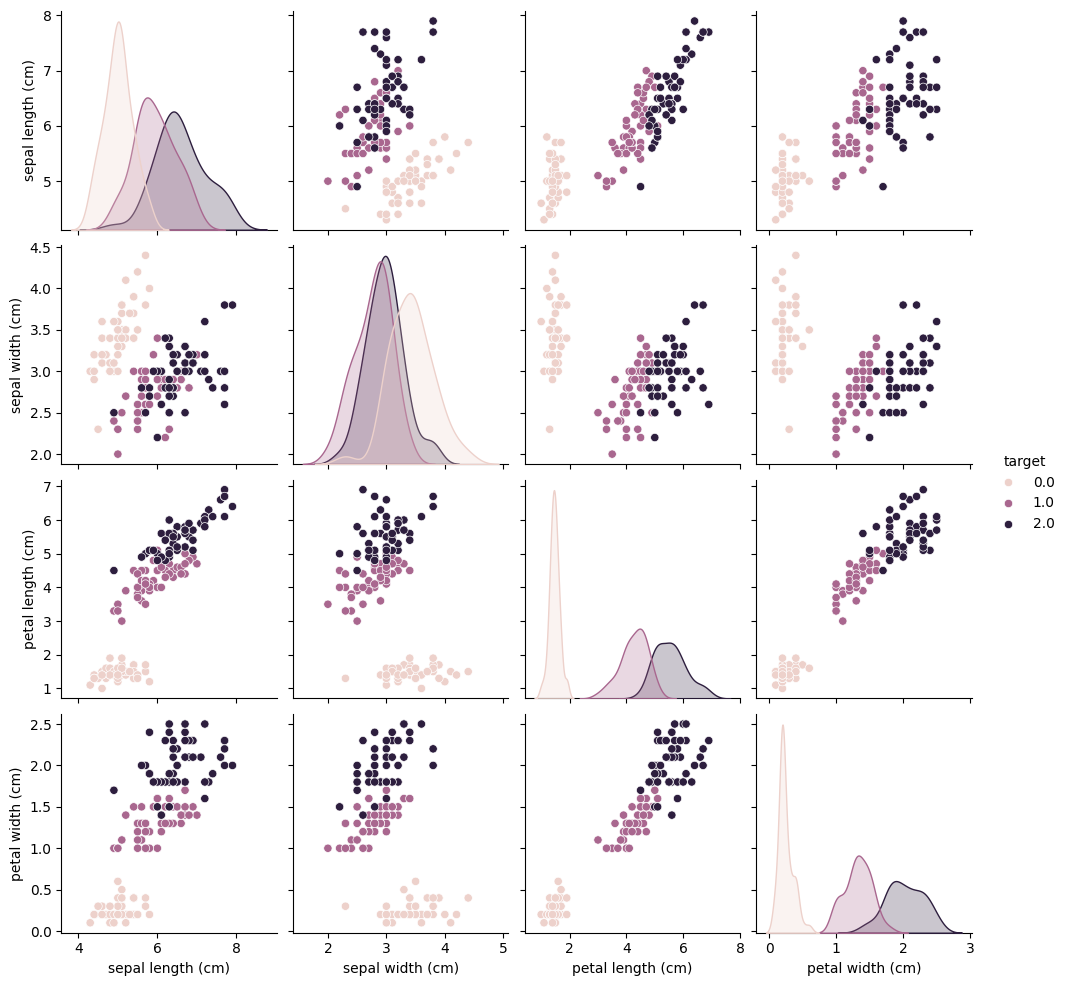

In [2]:
# Load the Iris dataset from sklearn datasets
from sklearn import datasets
iris = datasets.load_iris()

# Convert the dataset to a pandas DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Display the first 5 rows of the DataFrame
print(iris_df.head())

# Display the summary statistics of the DataFrame
print(iris_df.describe())

# Display the distribution of the target variable
sns.countplot(x='target', data=iris_df)
plt.show()

# Display the pairplot of the DataFrame
sns.pairplot(iris_df, hue='target')
plt.show()

# Data Preprocessing
Preprocess the data by splitting it into training and testing sets, and scaling the features.

In [3]:
# Importing the required libraries for data preprocessing
from sklearn.model_selection import train_test_split # For splitting the data into training and testing sets
from sklearn.preprocessing import StandardScaler # For feature scaling

# Splitting the data into features and target variable
X = iris_df.iloc[:, :-1].values # Features
y = iris_df.iloc[:, -1].values # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Naive Bayes Classifier
Train the Naive Bayes Classifier on the training data.

In [4]:
# Importing the required library for Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Creating an instance of the Naive Bayes Classifier
classifier = GaussianNB()

# Training the Naive Bayes Classifier on the training data
classifier.fit(X_train, y_train)

GaussianNB()

# Make Predictions and Evaluate the Model
Use the trained model to make predictions on the test data and evaluate the model's performance.

In [5]:
# Making predictions on the test data
y_pred = classifier.predict(X_test)

# Importing the required libraries for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

# Generating the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Display the Confusion Matrix
Display the confusion matrix to visualize the performance of the classifier.

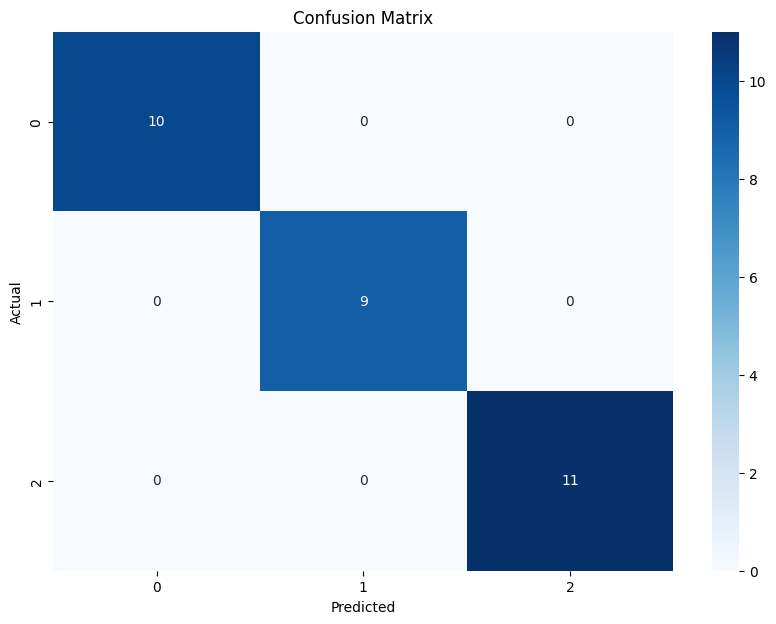

In [6]:
# Displaying the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perform Exploratory Data Analysis (EDA) and Plotting
Perform EDA on the Iris dataset and create plots to visualize the distribution and relationships of the features.

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


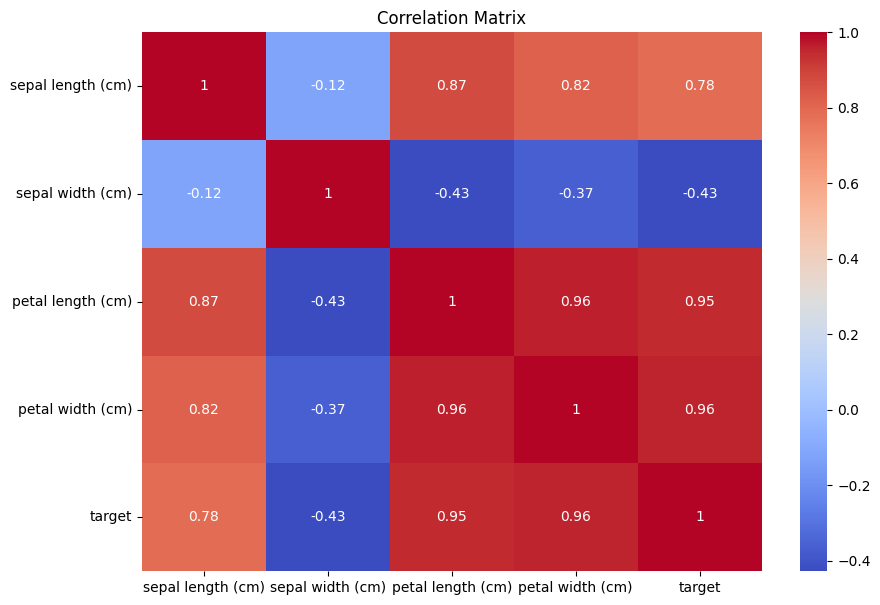

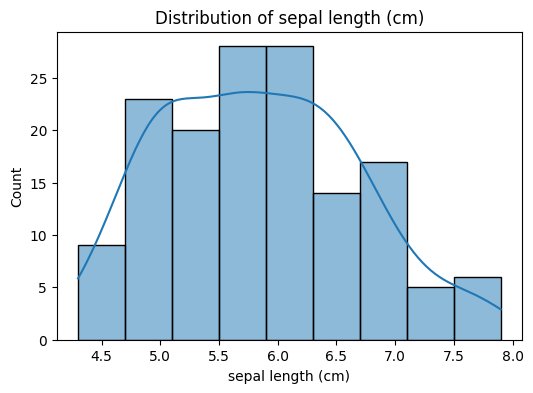

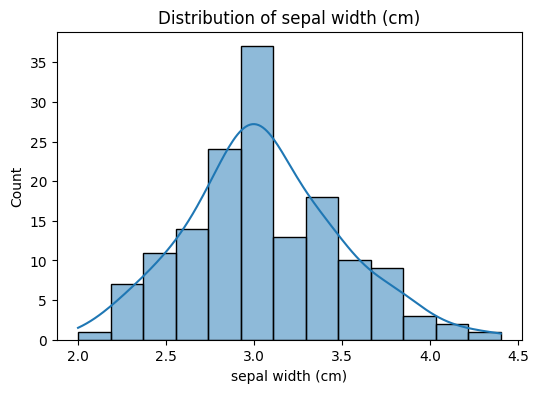

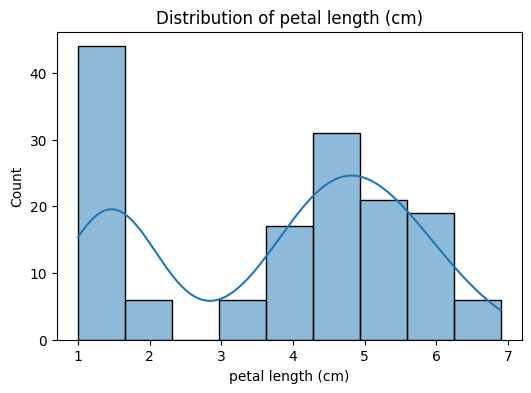

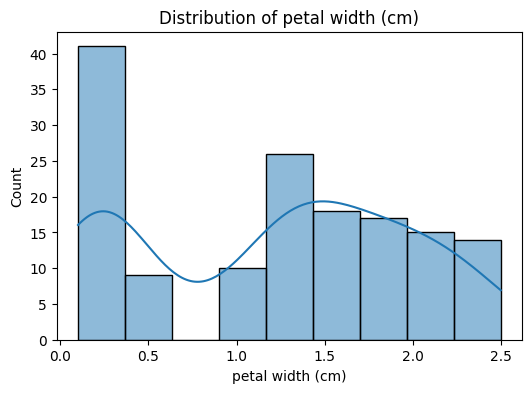

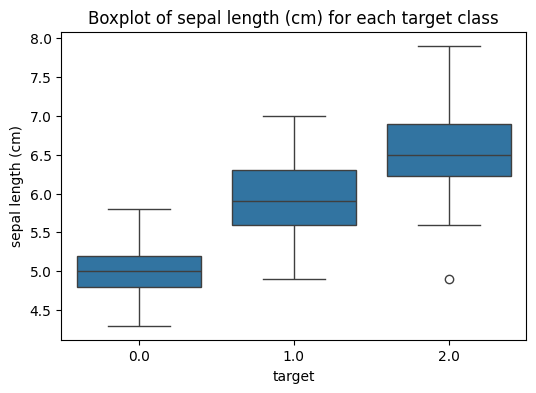

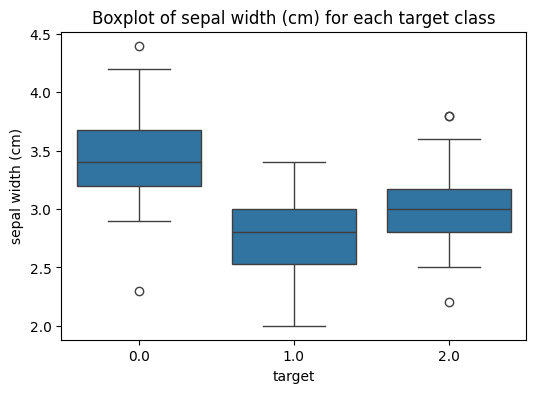

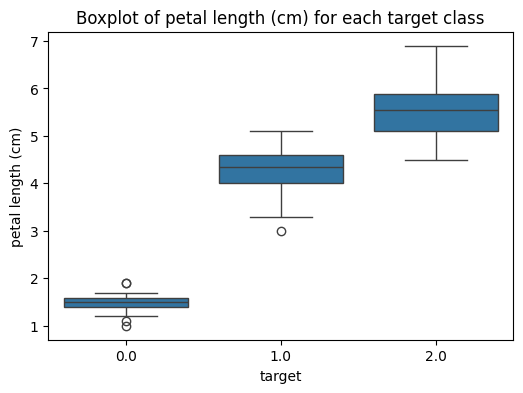

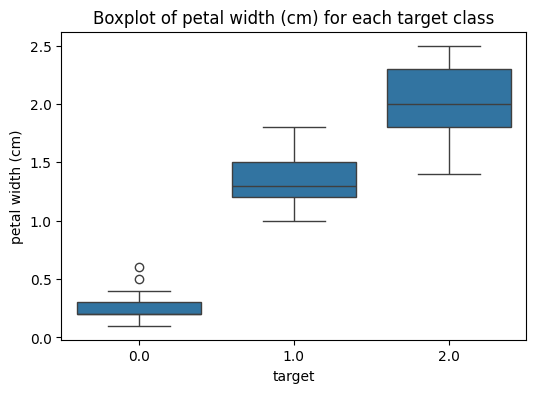

In [7]:
# Checking for missing values in the dataset
print(iris_df.isnull().sum())

# Displaying the correlation matrix
corr_matrix = iris_df.corr()
print(corr_matrix)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Displaying the distribution of each feature
for column in iris_df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.histplot(iris_df[column], kde=True)
    plt.title('Distribution of ' + column)
    plt.show()

# Displaying the boxplot of each feature
for column in iris_df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=column, data=iris_df)
    plt.title('Boxplot of ' + column + ' for each target class')
    plt.show()

# Naive Bayes Classification on Iris Dataset without Sklearn

In [4]:
import numpy as np
import math

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_c = X[y==c]
            self.parameters.append([])
            for col in X_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def predict(self, X):
        probs = np.zeros((len(X), len(self.classes)))
        for i, params in enumerate(self.parameters):
            for j, p in enumerate(params):
                mean, var = p["mean"], p["var"]
                probs[:, i] += self.gaussian_pdf(X[:, j], mean, np.sqrt(var))
        return self.classes[np.argmax(probs, axis=1)]

    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return np.log(left*right)

In [7]:
import pandas as pd
from urllib.request import urlopen

# Load the iris dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(urlopen(url), names=names)

# Map class names to numbers
class_mapping = {label: idx for idx, label in enumerate(np.unique(dataset['class']))}
dataset['class'] = dataset['class'].map(class_mapping)

# Split the data into features (X) and target (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the data into a training set and a test set
test_ratio = 0.2
num_test = int(test_ratio * len(y))
indices = np.random.permutation(len(y))
X_train = X[indices[:-num_test]]
y_train = y[indices[:-num_test]]
X_test = X[indices[-num_test:]]
y_test = y[indices[-num_test:]]

# Create and train the classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions on the test set and calculate the accuracy
predictions = nb.predict(X_test)
accuracy = (predictions == y_test).mean()

print(f"Accuracy: {accuracy * 100:.2f}%")
print (f"or Accuracy: {accuracy}")

Accuracy: 93.33%
or Accuracy: 0.9333333333333333
